# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Bidirectional, GRU
from sklearn.preprocessing import MinMaxScaler

# Import dataset

In [2]:
dataset_path = ('../dataset/testbed_flat_tms.csv')
df = pd.read_csv(dataset_path)

# Detach a single OD traffic

In [3]:
od_number = 52
dataset = df.iloc[:, od_number]
dataset = dataset.astype('float32')
dataset = dataset.values
dataset = np.reshape(dataset,(-1,1))
dataset

array([[ 8511.],
       [34805.],
       [40689.],
       ...,
       [40698.],
       [41729.],
       [29065.]], dtype=float32)

# Data preparation

In [4]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
	    a = dataset[i:(i+look_back), 0]
	    dataX.append(a)
	    dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("train_data_size: " + str(trainX.shape[0]), " test_data_size: " + str(testX.shape[0]))

train_data_size: 4994  test_data_size: 1241


# Build models

In [5]:
vanilla_lstm = Sequential()
vanilla_lstm.add(LSTM(100, input_dim=look_back, activation="relu"))
vanilla_lstm.add(Dense(1))
vanilla_lstm.compile(loss='mean_squared_error', optimizer='adam')

vanilla_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               44400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 44,501
Trainable params: 44,501
Non-trainable params: 0
_________________________________________________________________


In [6]:
Bilstm_model = Sequential()
Bilstm_model.add(Bidirectional(LSTM(100, input_dim=look_back, activation="relu")))
Bilstm_model.add(Dense(1))
Bilstm_model.compile(loss='mean_squared_error', optimizer='adam')

Bilstm_model.build(input_shape = (trainX.shape[0],1,10))
Bilstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (4994, 200)               88800     
_________________________________________________________________
dense_1 (Dense)              (4994, 1)                 201       
Total params: 89,001
Trainable params: 89,001
Non-trainable params: 0
_________________________________________________________________


In [7]:
gru = Sequential()
gru.add(GRU(100, input_dim=look_back, activation="relu"))
gru.add(Dense(1))
gru.compile(loss='mean_squared_error', optimizer='adam')

gru.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100)               33600     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 33,701
Trainable params: 33,701
Non-trainable params: 0
_________________________________________________________________


# Feed data into models

In [8]:
vanilla_lstm.fit(trainX, trainY, epochs=200, batch_size=32, verbose=2,validation_split=0.3)

Epoch 1/200
110/110 - 0s - loss: 0.1268 - val_loss: 0.0164
Epoch 2/200
110/110 - 0s - loss: 0.0164 - val_loss: 0.0162
Epoch 3/200
110/110 - 0s - loss: 0.0162 - val_loss: 0.0159
Epoch 4/200
110/110 - 0s - loss: 0.0158 - val_loss: 0.0154
Epoch 5/200
110/110 - 0s - loss: 0.0153 - val_loss: 0.0151
Epoch 6/200
110/110 - 0s - loss: 0.0148 - val_loss: 0.0145
Epoch 7/200
110/110 - 0s - loss: 0.0144 - val_loss: 0.0142
Epoch 8/200
110/110 - 0s - loss: 0.0140 - val_loss: 0.0136
Epoch 9/200
110/110 - 0s - loss: 0.0136 - val_loss: 0.0134
Epoch 10/200
110/110 - 0s - loss: 0.0134 - val_loss: 0.0130
Epoch 11/200
110/110 - 0s - loss: 0.0131 - val_loss: 0.0127
Epoch 12/200
110/110 - 0s - loss: 0.0129 - val_loss: 0.0125
Epoch 13/200
110/110 - 0s - loss: 0.0127 - val_loss: 0.0125
Epoch 14/200
110/110 - 0s - loss: 0.0127 - val_loss: 0.0123
Epoch 15/200
110/110 - 0s - loss: 0.0126 - val_loss: 0.0122
Epoch 16/200
110/110 - 0s - loss: 0.0125 - val_loss: 0.0126
Epoch 17/200
110/110 - 0s - loss: 0.0125 - val_lo

110/110 - 0s - loss: 0.0093 - val_loss: 0.0085
Epoch 138/200
110/110 - 0s - loss: 0.0091 - val_loss: 0.0087
Epoch 139/200
110/110 - 0s - loss: 0.0091 - val_loss: 0.0088
Epoch 140/200
110/110 - 0s - loss: 0.0091 - val_loss: 0.0084
Epoch 141/200
110/110 - 0s - loss: 0.0091 - val_loss: 0.0087
Epoch 142/200
110/110 - 0s - loss: 0.0091 - val_loss: 0.0089
Epoch 143/200
110/110 - 0s - loss: 0.0090 - val_loss: 0.0087
Epoch 144/200
110/110 - 0s - loss: 0.0089 - val_loss: 0.0087
Epoch 145/200
110/110 - 0s - loss: 0.0090 - val_loss: 0.0087
Epoch 146/200
110/110 - 0s - loss: 0.0091 - val_loss: 0.0093
Epoch 147/200
110/110 - 0s - loss: 0.0090 - val_loss: 0.0097
Epoch 148/200
110/110 - 0s - loss: 0.0092 - val_loss: 0.0088
Epoch 149/200
110/110 - 0s - loss: 0.0090 - val_loss: 0.0084
Epoch 150/200
110/110 - 0s - loss: 0.0088 - val_loss: 0.0084
Epoch 151/200
110/110 - 0s - loss: 0.0089 - val_loss: 0.0084
Epoch 152/200
110/110 - 0s - loss: 0.0088 - val_loss: 0.0086
Epoch 153/200
110/110 - 0s - loss: 0.0

In [9]:
Bilstm_model.fit(trainX, trainY, epochs=200, batch_size=32, verbose=2,validation_split=0.3)

Epoch 1/200
110/110 - 0s - loss: 0.0639 - val_loss: 0.0165
Epoch 2/200
110/110 - 0s - loss: 0.0164 - val_loss: 0.0158
Epoch 3/200
110/110 - 0s - loss: 0.0156 - val_loss: 0.0151
Epoch 4/200
110/110 - 0s - loss: 0.0151 - val_loss: 0.0161
Epoch 5/200
110/110 - 0s - loss: 0.0146 - val_loss: 0.0139
Epoch 6/200
110/110 - 0s - loss: 0.0139 - val_loss: 0.0135
Epoch 7/200
110/110 - 0s - loss: 0.0137 - val_loss: 0.0132
Epoch 8/200
110/110 - 0s - loss: 0.0135 - val_loss: 0.0133
Epoch 9/200
110/110 - 0s - loss: 0.0132 - val_loss: 0.0128
Epoch 10/200
110/110 - 0s - loss: 0.0132 - val_loss: 0.0127
Epoch 11/200
110/110 - 0s - loss: 0.0129 - val_loss: 0.0132
Epoch 12/200
110/110 - 0s - loss: 0.0129 - val_loss: 0.0128
Epoch 13/200
110/110 - 0s - loss: 0.0127 - val_loss: 0.0135
Epoch 14/200
110/110 - 0s - loss: 0.0124 - val_loss: 0.0120
Epoch 15/200
110/110 - 0s - loss: 0.0122 - val_loss: 0.0124
Epoch 16/200
110/110 - 0s - loss: 0.0122 - val_loss: 0.0120
Epoch 17/200
110/110 - 0s - loss: 0.0121 - val_lo

110/110 - 0s - loss: 0.0071 - val_loss: 0.0065
Epoch 138/200
110/110 - 0s - loss: 0.0068 - val_loss: 0.0067
Epoch 139/200
110/110 - 0s - loss: 0.0069 - val_loss: 0.0075
Epoch 140/200
110/110 - 0s - loss: 0.0068 - val_loss: 0.0070
Epoch 141/200
110/110 - 0s - loss: 0.0069 - val_loss: 0.0073
Epoch 142/200
110/110 - 0s - loss: 0.0068 - val_loss: 0.0063
Epoch 143/200
110/110 - 0s - loss: 0.0069 - val_loss: 0.0077
Epoch 144/200
110/110 - 0s - loss: 0.0070 - val_loss: 0.0064
Epoch 145/200
110/110 - 0s - loss: 0.0068 - val_loss: 0.0063
Epoch 146/200
110/110 - 0s - loss: 0.0068 - val_loss: 0.0065
Epoch 147/200
110/110 - 0s - loss: 0.0065 - val_loss: 0.0063
Epoch 148/200
110/110 - 0s - loss: 0.0069 - val_loss: 0.0062
Epoch 149/200
110/110 - 0s - loss: 0.0069 - val_loss: 0.0062
Epoch 150/200
110/110 - 0s - loss: 0.0067 - val_loss: 0.0063
Epoch 151/200
110/110 - 0s - loss: 0.0069 - val_loss: 0.0063
Epoch 152/200
110/110 - 0s - loss: 0.0067 - val_loss: 0.0061
Epoch 153/200
110/110 - 0s - loss: 0.0

In [10]:
gru.fit(trainX, trainY, epochs=200, batch_size=32, verbose=2,validation_split=0.3)

Epoch 1/200
110/110 - 0s - loss: 0.0624 - val_loss: 0.0166
Epoch 2/200
110/110 - 0s - loss: 0.0165 - val_loss: 0.0161
Epoch 3/200
110/110 - 0s - loss: 0.0161 - val_loss: 0.0155
Epoch 4/200
110/110 - 0s - loss: 0.0155 - val_loss: 0.0150
Epoch 5/200
110/110 - 0s - loss: 0.0150 - val_loss: 0.0145
Epoch 6/200
110/110 - 0s - loss: 0.0145 - val_loss: 0.0140
Epoch 7/200
110/110 - 0s - loss: 0.0142 - val_loss: 0.0136
Epoch 8/200
110/110 - 0s - loss: 0.0138 - val_loss: 0.0142
Epoch 9/200
110/110 - 0s - loss: 0.0138 - val_loss: 0.0134
Epoch 10/200
110/110 - 0s - loss: 0.0134 - val_loss: 0.0133
Epoch 11/200
110/110 - 0s - loss: 0.0134 - val_loss: 0.0131
Epoch 12/200
110/110 - 0s - loss: 0.0132 - val_loss: 0.0128
Epoch 13/200
110/110 - 0s - loss: 0.0133 - val_loss: 0.0126
Epoch 14/200
110/110 - 0s - loss: 0.0129 - val_loss: 0.0126
Epoch 15/200
110/110 - 0s - loss: 0.0128 - val_loss: 0.0126
Epoch 16/200
110/110 - 0s - loss: 0.0129 - val_loss: 0.0125
Epoch 17/200
110/110 - 0s - loss: 0.0127 - val_lo

110/110 - 0s - loss: 0.0079 - val_loss: 0.0075
Epoch 138/200
110/110 - 0s - loss: 0.0081 - val_loss: 0.0075
Epoch 139/200
110/110 - 0s - loss: 0.0080 - val_loss: 0.0073
Epoch 140/200
110/110 - 0s - loss: 0.0080 - val_loss: 0.0074
Epoch 141/200
110/110 - 0s - loss: 0.0077 - val_loss: 0.0072
Epoch 142/200
110/110 - 0s - loss: 0.0076 - val_loss: 0.0072
Epoch 143/200
110/110 - 0s - loss: 0.0078 - val_loss: 0.0073
Epoch 144/200
110/110 - 0s - loss: 0.0077 - val_loss: 0.0072
Epoch 145/200
110/110 - 0s - loss: 0.0076 - val_loss: 0.0071
Epoch 146/200
110/110 - 0s - loss: 0.0075 - val_loss: 0.0080
Epoch 147/200
110/110 - 0s - loss: 0.0078 - val_loss: 0.0085
Epoch 148/200
110/110 - 0s - loss: 0.0078 - val_loss: 0.0072
Epoch 149/200
110/110 - 0s - loss: 0.0079 - val_loss: 0.0077
Epoch 150/200
110/110 - 0s - loss: 0.0075 - val_loss: 0.0071
Epoch 151/200
110/110 - 0s - loss: 0.0077 - val_loss: 0.0071
Epoch 152/200
110/110 - 0s - loss: 0.0075 - val_loss: 0.0073
Epoch 153/200
110/110 - 0s - loss: 0.0

# Evaluation

In [11]:
vanilla_predict = vanilla_lstm.predict(testX)
vanilla_result = scaler.inverse_transform(vanilla_predict)

In [12]:
bilstm_predict = Bilstm_model.predict(testX)
bilstm_result = scaler.inverse_transform(bilstm_predict)

In [13]:
gru_predict = gru.predict(testX)
gru_result = scaler.inverse_transform(gru_predict)

In [14]:
true_testY = scaler.inverse_transform([testY])
true_testY = np.reshape(true_testY,(true_testY.shape[1],1))

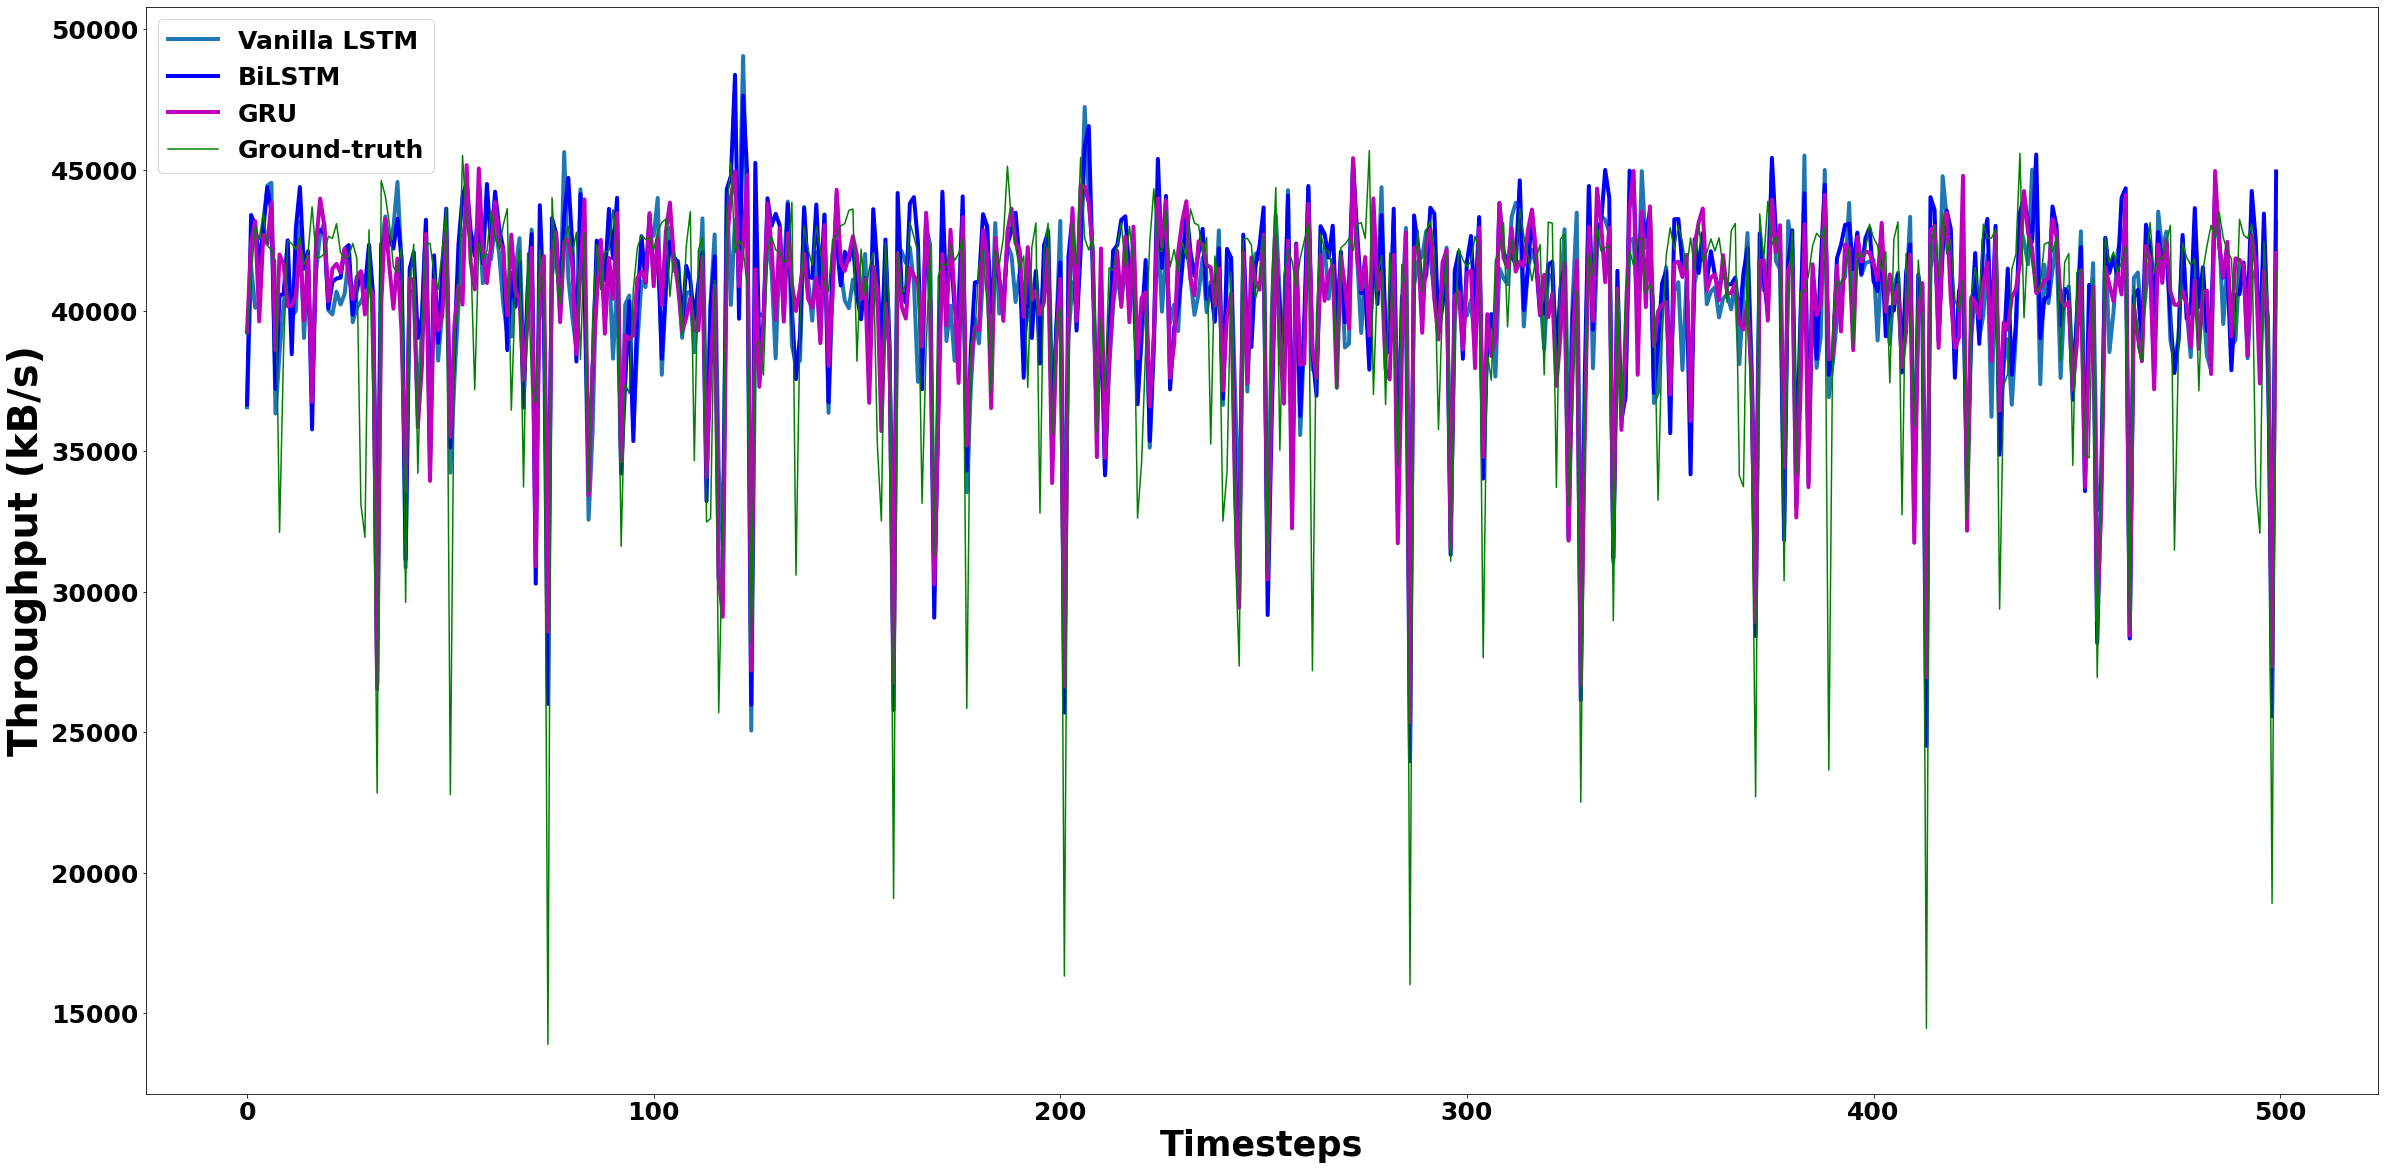

In [15]:
timesteps = 500
plt.rcParams["figure.figsize"] = (40,20)
plt.rcParams.update({'font.size': 25, 'font.weight' : 'bold'})
plt.plot(vanilla_result[0:timesteps], label = "Vanilla LSTM",linewidth=4)
plt.plot(bilstm_result[0:timesteps], label = "BiLSTM",linewidth=4, color='b')
plt.plot(gru_result[0:timesteps], label = "GRU",linewidth=4, color='m')
plt.plot(true_testY[0:timesteps], label = "Ground-truth", color = 'g')
plt.xlabel('Timesteps', fontweight='bold', fontsize=35)
plt.ylabel('Throughput (kB/s)', fontweight='bold', fontsize = 40)
plt.legend()

# Calculate RMSE

In [16]:
vanil_temp = 0
bi_temp = 0
gru_temp = 0

for i in range(len(testY)):
    vanil_temp += (testY[i] - vanilla_predict[i])**2
    bi_temp += (testY[i] - bilstm_predict[i])**2
    gru_temp += (testY[i] - gru_predict[i])**2

v_rmse = math.sqrt(vanil_temp / len(testY))
b_rmse = math.sqrt(bi_temp / len(testY))
g_rmse = math.sqrt(gru_temp / len(testY))

<BarContainer object of 3 artists>

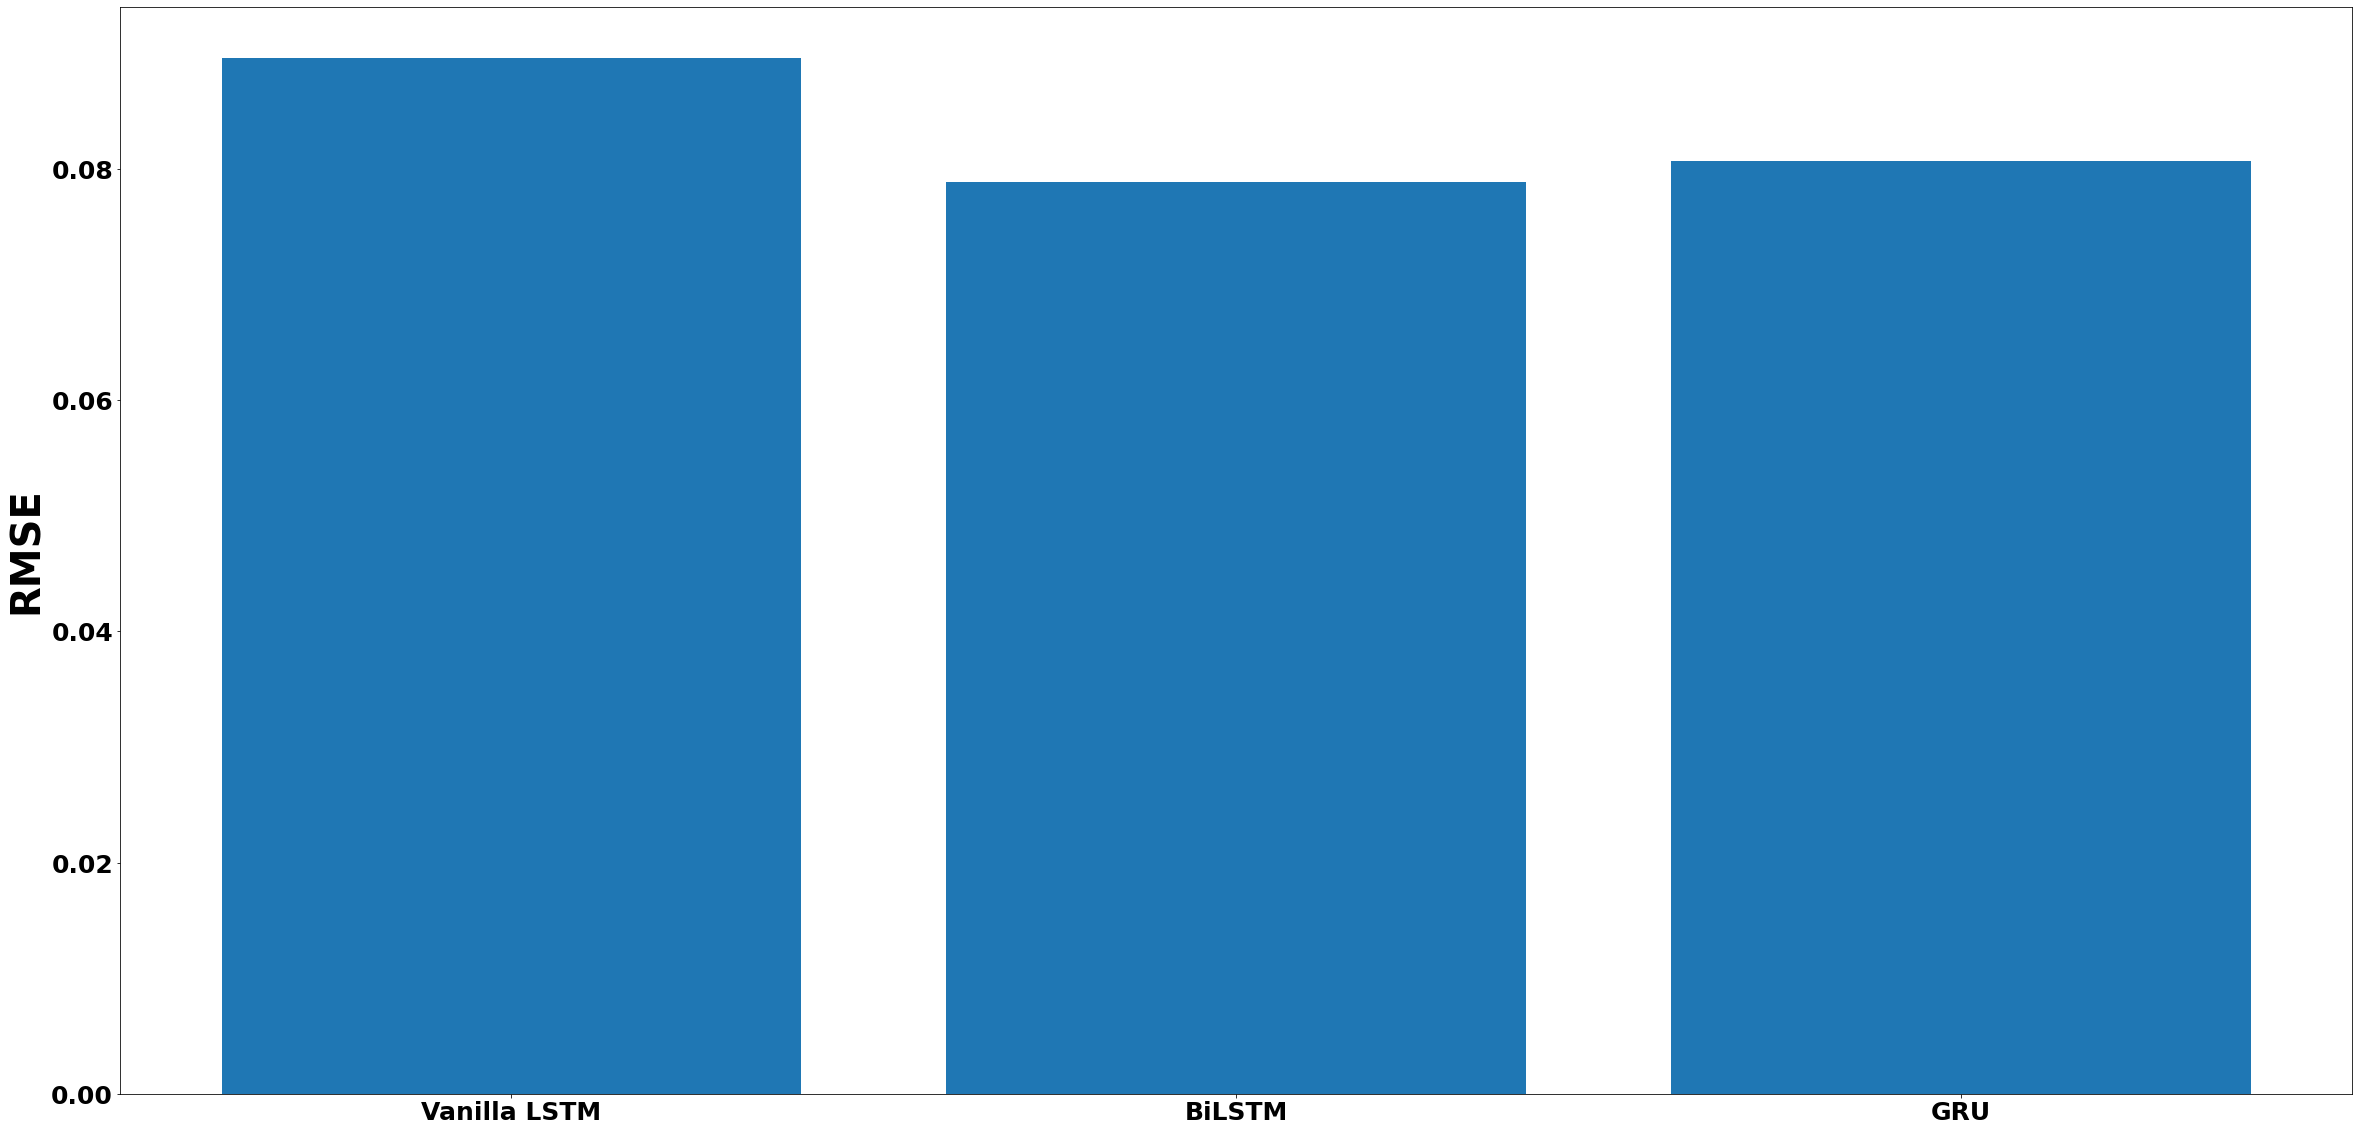

In [17]:
fig = plt.figure()
names = ['Vanilla LSTM', 'BiLSTM', 'GRU']
values = [v_rmse,b_rmse,g_rmse]
plt.ylabel('RMSE', fontweight='bold',fontsize= 40)
# plt.ylim([0.006,0.0125])
plt.bar(names,values) 